### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
digits = datasets.load_digits()
print(digits.keys())
print(digits.images.shape) ### 1,797 個 8 x 8 像素的矩陣
print()
print('Shape: {}'.format(digits.data.shape))
print('Target Names:{}'.format(digits.target_names))

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)

Shape: (1797, 64)
Target Names:[0 1 2 3 4 5 6 7 8 9]


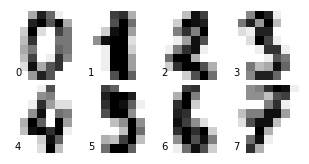

In [34]:
# 設定圖形的大小（寬, 高）
fig = plt.figure(figsize=(4, 2))

# 調整子圖形 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 把前 8 個手寫數字顯示在子圖形
for i in range(8):
    # 在 2 x 4 網格中第 i + 1 個位置繪製子圖形，並且關掉座標軸刻度
    ax = fig.add_subplot(2, 4, i + 1, xticks = [], yticks = [])
    # 顯示圖形，色彩選擇灰階
    ax.imshow(digits.images[i], cmap = plt.cm.binary)
    # 在左下角標示目標值
    ax.text(0, 7, str(digits.target[i]))

# 顯示圖形
plt.show()

In [35]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, 
                                                    random_state=0, stratify=digits.target)

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)

In [36]:
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.9629629629629629


Confusion Matrix Function Sample Code

In [38]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=0)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

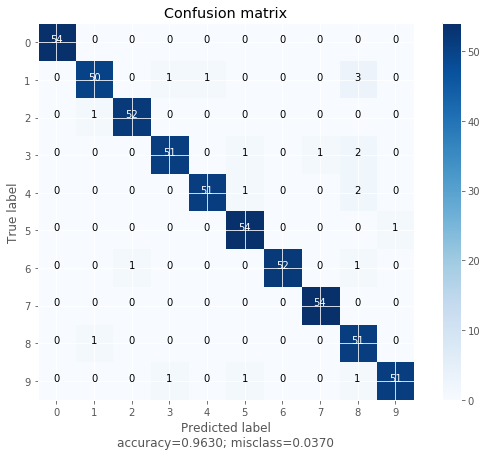

In [39]:
plot_confusion_matrix(cm=metrics.confusion_matrix(y_test, y_pred),
                      target_names=digits.target_names,
                      normalize=False)